# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Andy Asher [Github Link](https://github.com/andyakiva/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Pre-question Installs and set up

In [127]:
# Create and activate a Python virtual environment. 

import requests

response = requests.get('https://en.wikipedia.org/wiki/Data_mining')

print(response.status_code)
print(response.headers['content-type'])

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

200
text/html; charset=UTF-8


# Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [128]:
import requests
response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
soup = BeautifulSoup(response.text, "html.parser")
article_html = str(soup.find("article"))
with open("article_html.pkl", "wb") as file:
    pickle.dump(article_html, file)

# Question 2 

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [129]:
from bs4 import BeautifulSoup
import pickle

# parser = 'html5lib'
parser = 'html.parser'

with open("article_html.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, parser)
    

text = soup.get_text()
print(text)







How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

# Question 3 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [130]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

#load the article
nlp = spacy.load('en_core_web_sm')
# why not, let's add some fun sentiment analysis, because we can
nlp.add_pipe('spacytextblob')
doc = nlp(soup.get_text())

#define our tokens of interest
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

#print the top 5
from collections import Counter
word_freq = Counter(map(str,interesting_tokens))
commontok = word_freq.most_common(5)
print("Most common tokens:")
for token, frequency in commontok:
    print(f"{token}")

#count and print all tokens
print(f"\nAll tokens and frequency of appearance:")
for token, frequency in word_freq.most_common():
    print(f"{token} appears {frequency} times")


Most common tokens:
laser
headlights
headlight
technology
led

All tokens and frequency of appearance:
laser appears 35 times
headlights appears 19 times
headlight appears 11 times
technology appears 10 times
led appears 10 times
light appears 9 times
high appears 8 times
beam appears 7 times
automotive appears 6 times
leds appears 6 times
aftermarket appears 6 times
come appears 5 times
lasers appears 5 times
beams appears 5 times
lighting appears 4 times
way appears 4 times
bmw appears 4 times
end appears 4 times
performance appears 4 times
day appears 3 times
mind appears 3 times
efficiency appears 3 times
power appears 3 times
designs appears 3 times
simple appears 3 times
new appears 3 times
inside appears 3 times
phosphor appears 3 times
vehicles appears 3 times
diode appears 3 times
directly appears 3 times
parts appears 3 times
car appears 3 times
work appears 2 times
march appears 2 times
thing appears 2 times
switch appears 2 times
engineers appears 2 times
world appears 2 ti

# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [131]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
commonlem = lemma_freq.most_common(5)


print("Most common lemmas:")
for token, frequency in commonlem:
    print(f"{token}")


print(f"\nAll lemmas and frequency of appearance:")
for token, frequency in lemma_freq.most_common():
    print(f"{token} appears {frequency} times")

Most common lemmas:
laser
headlight
beam
technology
light

All lemmas and frequency of appearance:
laser appears 40 times
headlight appears 28 times
beam appears 12 times
technology appears 10 times
light appears 10 times
lead appears 9 times
high appears 9 times
come appears 7 times
led appears 7 times
automotive appears 6 times
design appears 6 times
aftermarket appears 6 times
diode appears 5 times
day appears 4 times
lighting appears 4 times
way appears 4 times
vehicle appears 4 times
bmw appears 4 times
low appears 4 times
end appears 4 times
performance appears 4 times
work appears 3 times
thing appears 3 times
mind appears 3 times
efficiency appears 3 times
power appears 3 times
simple appears 3 times
new appears 3 times
inside appears 3 times
phosphor appears 3 times
temperature appears 3 times
directly appears 3 times
part appears 3 times
car appears 3 times
headlights appears 2 times
march appears 2 times
switch appears 2 times
mean appears 2 times
engineer appears 2 times
wo

# Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [132]:
def score_sentence_by_token(sentence, interesting_token):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc]
    score = sum(1 for token in tokens if token in interesting_token)/len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc]
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score    

#get first sentence
doc = nlp(text)
firstsent = next(doc.sents).text

#get words of interest
generatetokens = []
for token, frequency in commontok:
    generatetokens.append(token)

generatelemmas = []
for lemma, frequency in commonlem:
    generatelemmas.append(lemma)

#score first sentence
scoretoken = score_sentence_by_token(firstsent,generatetokens)
scorelem = score_sentence_by_lemma(firstsent,generatelemmas)

print("First Sentence:", firstsent)
print(f"The first sentence has a token score of {scoretoken}.")
print(f"The first sentence has a lemma score of {scorelem}.")


First Sentence: 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021









The first sentence has a token score of 0.1.
The first sentence has a lemma score of 0.05.


# Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

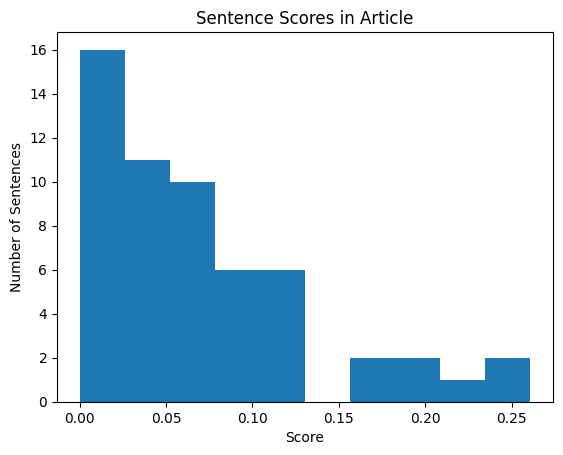

In [133]:
#list of scores
scores = []
for sentence in doc.sents:
    scoreholder = score_sentence_by_token(sentence.text,generatetokens)
    scores.append(scoreholder)

#plot a histogram
plt.hist(scores)
plt.title('Sentence Scores in Article')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.show()
    
# The most common score is 0. Scores decrease in frequency until about .13 where they dip and then level off

# Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

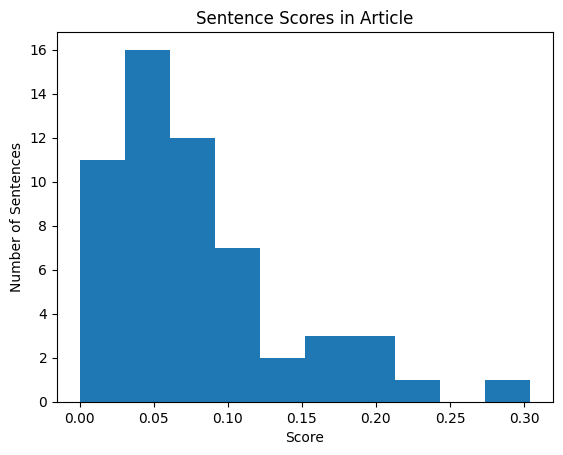

In [134]:
#list of scores
scores = []
for sentence in doc.sents:
    scoreholder = score_sentence_by_lemma(sentence.text,generatelemmas)
    scores.append(scoreholder)

#plot a histogram
plt.hist(scores)
plt.title('Sentence Scores in Article')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.show()

#The most common score is .05 with a fairly normal distribution with a strong positive skew

# Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Answer: 
All of the most common words can be used as nouns. We would use the part of speech tool at the end of our code to help identify words of interest.

score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)

would become

score = sum(1 for lemma in lemmas if lemma in interesting_lemmas and lemma.pos_ == 'NOUN') / len(lemmas)

and  

score = sum(1 for token in tokens if token in interesting_token)/len(tokens)

would become

score = sum(1 for token in tokens if token in interesting_token and token.pos == 'NOUN')/len(tokens)

In [135]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 375646 bytes to web-scraping.html
